# Exploratoy Data Analysis On School Bullying

Bullying is a common place in many schools and a lot of the times, it goes unidentfied and not enough is done about it. The goal of this project here is to perform EDA on the dataset and find out the factors that can be used to identify bullying and use these factors in a machine learning model to predict bullying schools. The dataset that I am using can be found on <a href="https://www.kaggle.com/datasets/leomartinelli/bullying-in-schools">kaggle</a> .

To achieve our goal in this project, we ae going to be taking the following steps:
* Clean the data - The entire data is contained in one column with what is supposed the other columns separated by a semicolon in this column. We are going to write a function to fix this and create a normal dataframe that we can work with. In this step, we are also going to make every column name lower case as well as change some of the column names.
* Check the column data type and also null entries - `pandas.DataFrame.info()` method can give us at a glance the data types of every column and also the number of null enties in the dataset as well as the dimension of the data.
* Check the number of unique values in each column and also the unique values in each of these columns.
* Finally we explore what factors can be used to identify bullying.

#### Summary:
* Weight is not a factor in identifying bullying.
* Girls are more likely to be bullied than boys
* Bullied students admitted to feeling more lonely than students who weren't bullied

In [1]:
# reading in the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
bullying = pd.read_csv("Bullying_2018.csv")

In [3]:
bullying.head()

,record;Bullied_on_school_property_in_past_12_months;Bullied_not_on_school_property_in_past_12_months;Cyber_bullied_in_past_12_months;Custom_Age;Sex;Physically_attacked;Physical_fighting;Felt_lonely;Close_friends;Miss_school_no_permission;Other_students_kind_and_helpful;Parents_understand_problems;Most_of_the_time_or_always_felt_lonely;Missed_classes_or_school_without_permission;Were_underweight;Were_overweight;Were_obese
0,1;Yes;Yes; ;13 years old;Female;0 times;0 time...
1,2;No;No;No;13 years old;Female;0 times;0 times...
2,3;No;No;No;14 years old;Male;0 times;0 times;N...
3,4;No;No;No;16 years old;Male;0 times;2 or 3 ti...
4,5;No;No;No;13 years old;Female;0 times;0 times...


In [4]:
bullying.shape

(56981, 1)

The dataset conists of just one column and 56981 entries

In [5]:
bullying.columns

Index(['record;Bullied_on_school_property_in_past_12_months;Bullied_not_on_school_property_in_past_12_months;Cyber_bullied_in_past_12_months;Custom_Age;Sex;Physically_attacked;Physical_fighting;Felt_lonely;Close_friends;Miss_school_no_permission;Other_students_kind_and_helpful;Parents_understand_problems;Most_of_the_time_or_always_felt_lonely;Missed_classes_or_school_without_permission;Were_underweight;Were_overweight;Were_obese'], dtype='object')

The values in the columns are separated by a semicolon, splitting the string by semicolon will give us our column names.

### Cleaning The Data

In [6]:
def clean_data(df):
    """
    Function to clean the dataset
    """
    df = pd.DataFrame(df.iloc[:, 0].apply(lambda x: x.split(";")).to_list(),
                      columns = df.columns.str.lower()[0].split(";")
                     )
    
    df.rename({"bullied_on_school_property_in_past_12_months": "bullied_in_school",
                "bullied_not_on_school_property_in_past_12_months": "bullied_not_school",
                "cyber_bullied_in_past_12_months": "cyber_bullied",
                "miss_school_no_permission": "missed_school",
                "missed_classes_or_school_without_permission": "missed_classes"}, axis=1, inplace=True
               )
    
    df.replace(" ", np.nan, inplace=True) 
    
    return df

In [7]:
%%time
bullying = clean_data(bullying)

CPU times: total: 453 ms
Wall time: 459 ms


In [8]:
bullying.head()

,record,bullied_in_school,bullied_not_school,cyber_bullied,custom_age,sex,physically_attacked,physical_fighting,felt_lonely,close_friends,missed_school,other_students_kind_and_helpful,parents_understand_problems,most_of_the_time_or_always_felt_lonely,missed_classes,were_underweight,were_overweight,were_obese
0,1,Yes,Yes,NaN,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,NaN,NaN,NaN
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,NaN,NaN,NaN
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,NaN,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,NaN,NaN,NaN


The dataset now has multiple columns for the different data points

### Checking Data types and null Values

In [9]:
bullying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   record                                  56981 non-null  object
 1   bullied_in_school                       55742 non-null  object
 2   bullied_not_school                      56492 non-null  object
 3   cyber_bullied                           56410 non-null  object
 4   custom_age                              56873 non-null  object
 5   sex                                     56445 non-null  object
 6   physically_attacked                     56741 non-null  object
 7   physical_fighting                       56713 non-null  object
 8   felt_lonely                             56615 non-null  object
 9   close_friends                           55905 non-null  object
 10  missed_school                           55117 non-null  object
 11  ot

The data types for every column is an object(string) data type. For the null values, every of the column have null values since we replaced the empty strings with `numpy.nan`.

In [10]:
# checking the null percentage for each column
bullying.isnull().sum()/bullying.shape[0] * 100

record                                     0.000000
bullied_in_school                          2.174409
bullied_not_school                         0.858181
cyber_bullied                              1.002088
custom_age                                 0.189537
sex                                        0.940664
physically_attacked                        0.421193
physical_fighting                          0.470332
felt_lonely                                0.642319
close_friends                              1.888349
missed_school                              3.271266
other_students_kind_and_helpful            2.736000
parents_understand_problems                4.164546
most_of_the_time_or_always_felt_lonely     0.642319
missed_classes                             3.271266
were_underweight                          36.729787
were_overweight                           36.729787
were_obese                                36.729787
dtype: float64

Most of the null values in the columns are under 5% with the exception of the last 3 columns.

### Checking Unique Values

In [11]:
bullying.nunique()

record                                    56981
bullied_in_school                             2
bullied_not_school                            2
cyber_bullied                                 2
custom_age                                    8
sex                                           2
physically_attacked                           8
physical_fighting                             8
felt_lonely                                   5
close_friends                                 4
missed_school                                 5
other_students_kind_and_helpful               5
parents_understand_problems                   5
most_of_the_time_or_always_felt_lonely        2
missed_classes                                2
were_underweight                              2
were_overweight                               2
were_obese                                    2
dtype: int64

Most of the columns have just 2 unique values. In the columns, there are at most 8 unique values.

In [12]:
for col in bullying.columns.drop("record"):
    print(col, ":", bullying[col].unique())
    print("\n")
    

bullied_in_school : ['Yes' 'No' nan]


bullied_not_school : ['Yes' 'No' nan]


cyber_bullied : [nan 'No' 'Yes']


custom_age : ['13 years old' '14 years old' '16 years old' '12 years old'
 '15 years old' '11 years old or younger' '17 years old' nan
 '18 years old or older']


sex : ['Female' 'Male' nan]


physically_attacked : ['0 times' '1 time' '12 or more times' '4 or 5 times' '2 or 3 times'
 '10 or 11 times' '8 or 9 times' '6 or 7 times' nan]


physical_fighting : ['0 times' '2 or 3 times' '1 time' '4 or 5 times' '6 or 7 times'
 '8 or 9 times' '10 or 11 times' nan '12 or more times']


felt_lonely : ['Always' 'Never' 'Rarely' 'Sometimes' 'Most of the time' nan]


close_friends : ['2' '3 or more' '0' nan '1']


missed_school : ['10 or more days' '0 days' '6 to 9 days' '3 to 5 days' nan '1 or 2 days']


other_students_kind_and_helpful : ['Never' 'Sometimes' 'Most of the time' nan 'Always' 'Rarely']


parents_understand_problems : ['Always' nan 'Most of the time' 'Never' 'Sometimes' '

## Factors Indicating Bullying.

The goal is to look at different factors here to see if there any strong indicators that a student is being bullied either in school, out of school or cyber bullied. One way is to look at factors which could trigger students to bully each other. Factors such as weight and sex. Another way is to look at the adverse effects of bullying. Do Kids miss classes or school because they are bullied, does it make them feel lonely, etc.


### Do Obesed Students Get Bullied More Frequently?

In [13]:
bullying["were_obese"].value_counts(normalize=True)

No     0.926356
Yes    0.073644
Name: were_obese, dtype: float64

Only 7% of respondents in the dataset are obese. A comparison will be made between non obese respondents and obese respondents to see if they are bullied more frequently or not.

In [14]:
obese = bullying[bullying["were_obese"] == "Yes"]
not_obese = bullying[bullying["were_obese"] == "No"]

#### Are obese Students bullied in school more frequently?

In [15]:
def comparison_plot(df1, df2, col, t):
    title = col.replace("_", " ").replace("not", "outside").title()
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    ax1 = df1[col].value_counts(normalize=True).plot.bar()
    plt.title(f"Percentage of {t[0]} Students" + f" {title}")
    plt.yticks([])
    plt.xlabel(title)
    plt.bar_label(ax1.containers[0], fmt="{:.2f}", color="b")
    plt.subplot(1, 2, 2)
    ax2 = df2[col].value_counts(normalize=True).plot.bar()
    plt.title(f"Percentage of {t[1]} Students" + f" {title}")
    plt.yticks([])
    plt.xlabel(title)
    plt.bar_label(ax2.containers[0], fmt="{:.2f}", color = "b")
    plt.show()

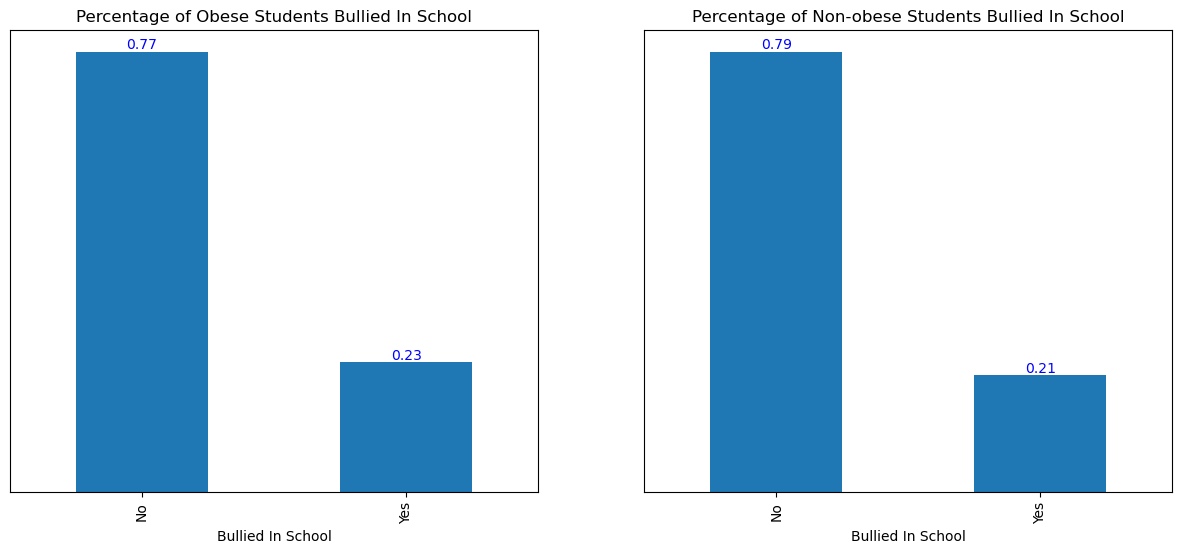

In [16]:
obese_title = ("Obese", "Non-obese")
comparison_plot(obese, not_obese,
               "bullied_in_school", obese_title)

Only 23% of the students who were obese were bullied in school compared to 21% of non-obese students. This suggests that being obese doesn't really play a role in a student being bullied in school or not. It is also important to check if obesity plays a role in being bullied outside school or cyber bullied.

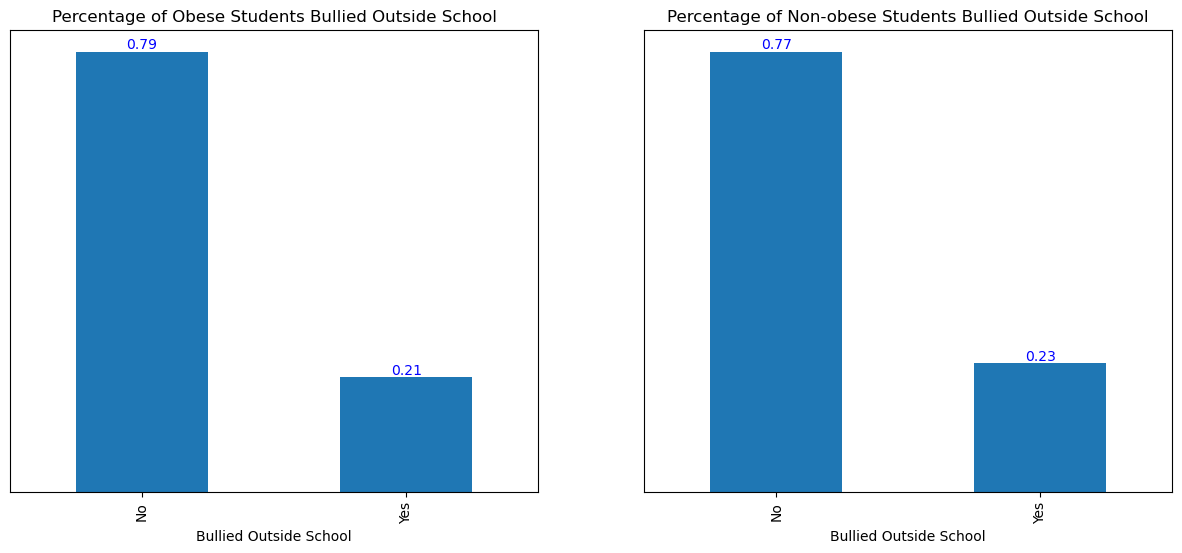

In [17]:
comparison_plot(obese, not_obese,
               "bullied_not_school", obese_title)

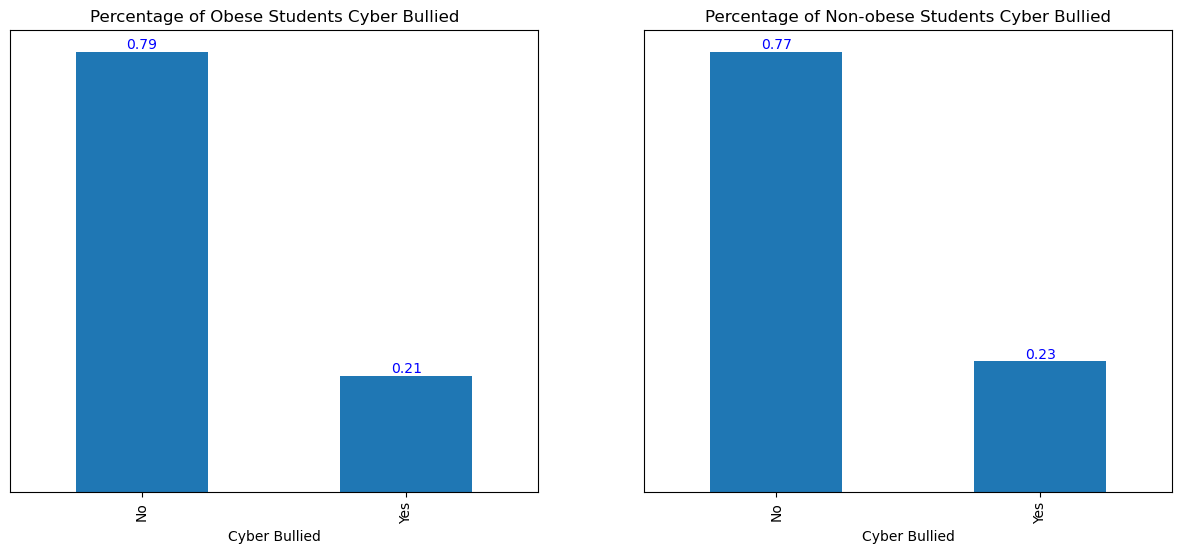

In [18]:
comparison_plot(obese, not_obese,
               "cyber_bullied", obese_title)

Again the pattern are similar as with the first comparison. There are no indications that being obese results in more frequent bullying.

### Are Underweight Students More Frequently Bullied?

In [19]:
underweight = bullying[bullying["were_underweight"] == "Yes"]
not_underweight = bullying[bullying["were_underweight"] == "No"]
underweight_title = ("Underweight", "Non-underweight")

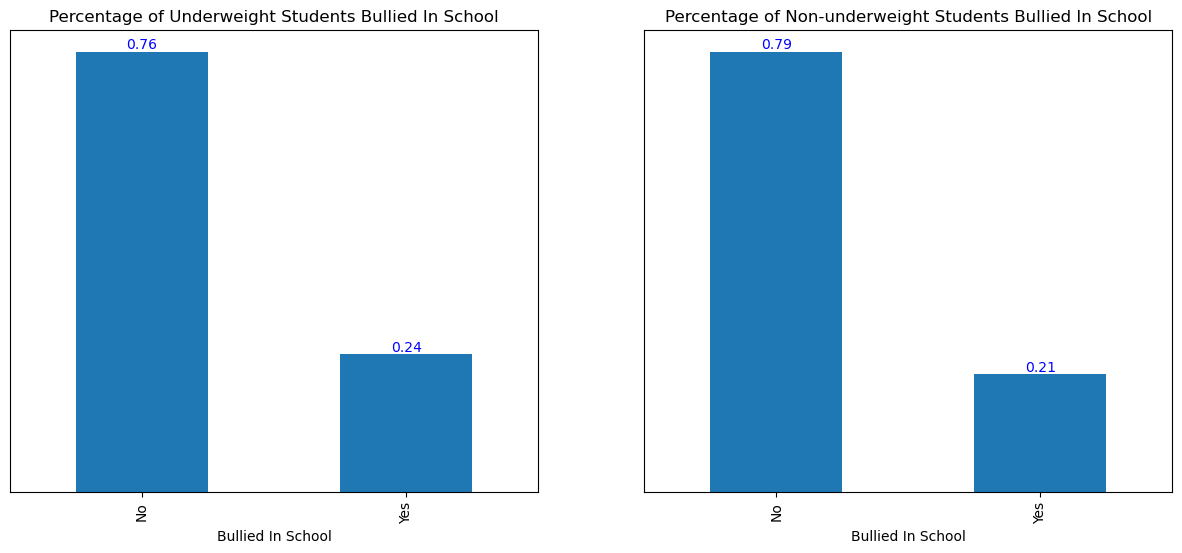

In [20]:
comparison_plot(underweight, not_underweight,
               "bullied_in_school", underweight_title)

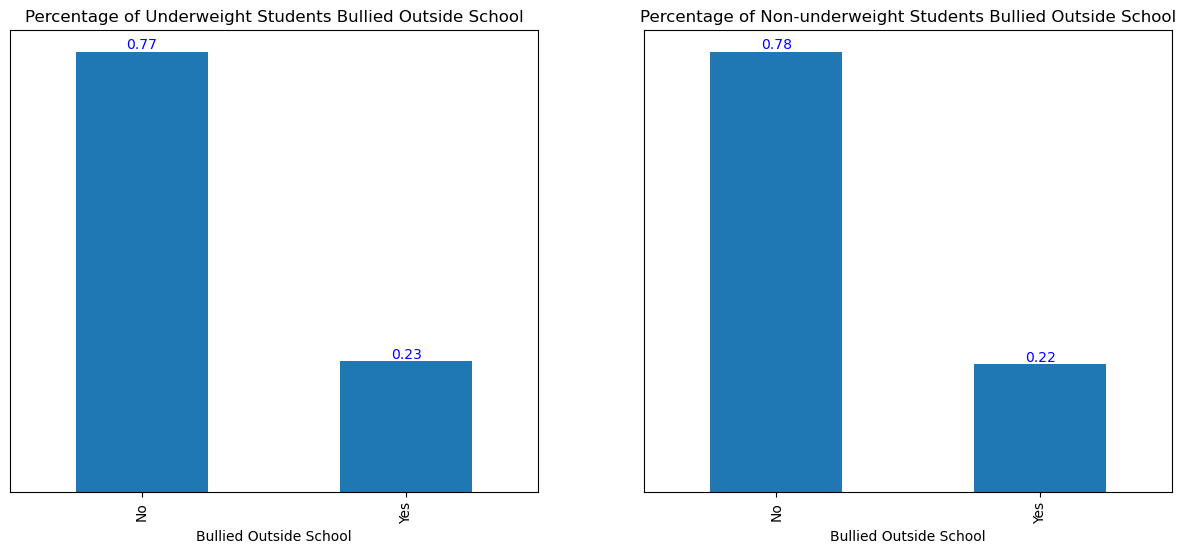

In [21]:
comparison_plot(underweight, not_underweight,
               "bullied_not_school", underweight_title)

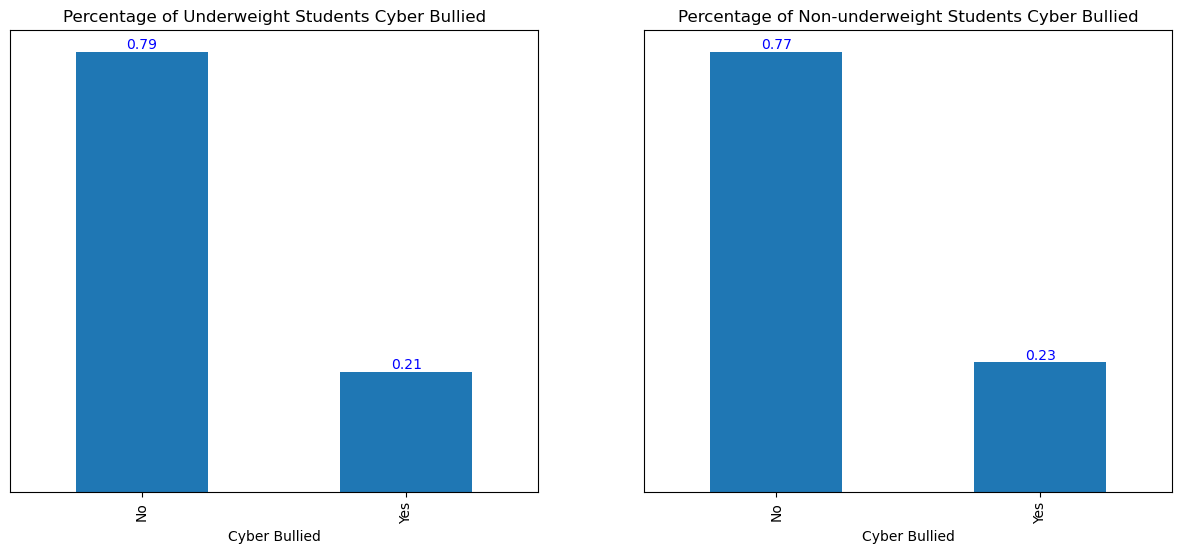

In [22]:
comparison_plot(underweight, not_underweight,
               "cyber_bullied", underweight_title)

Looking at the data for underweight students, it is a similar story to that of the obese students. There isn't much of a difference between the the students who were underweight and those who weren't.

### Is Bullying More Common Amongst Male Or Female Students?

In [23]:
male = bullying[bullying["sex"] == "Male"]
female = bullying[bullying["sex"] == "Female"]
sex_title = ("Male", "Female")

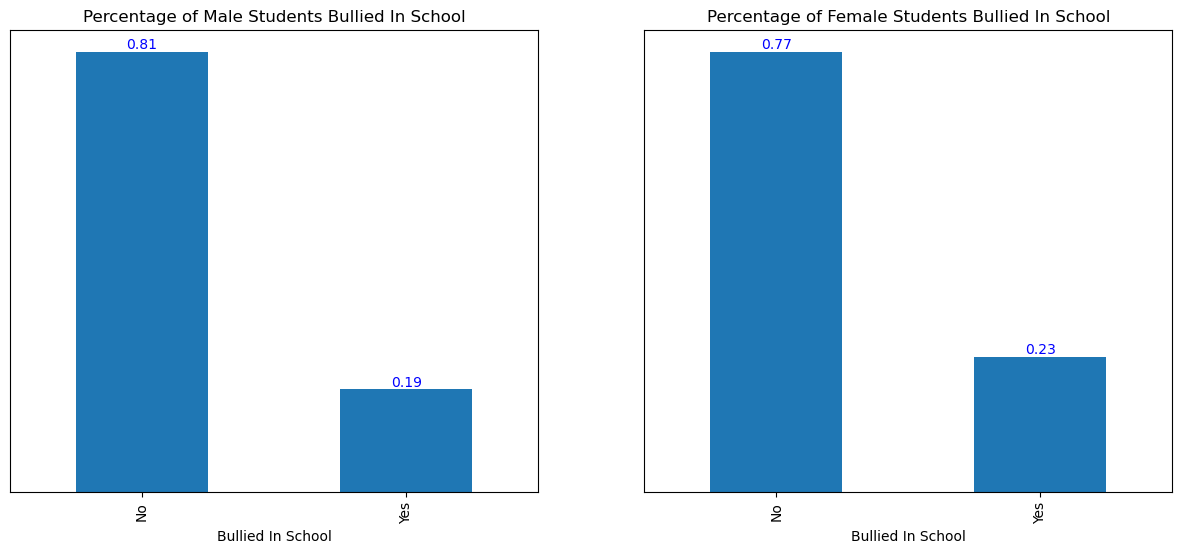

In [24]:
comparison_plot(male, female,
               "bullied_in_school", sex_title)

Only 19% of students who are male are bullied in school compared to 23% of female students.

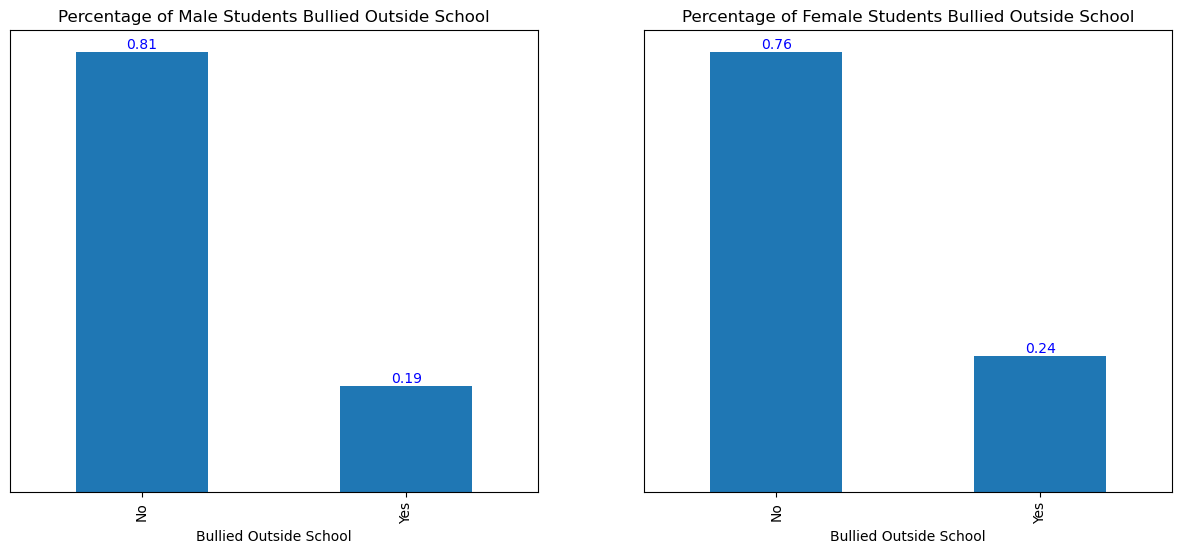

In [25]:
comparison_plot(male, female,
               "bullied_not_school", sex_title)

For the students bullied outside the school, it is the same story with 19% of the male students and 24% of the female students.

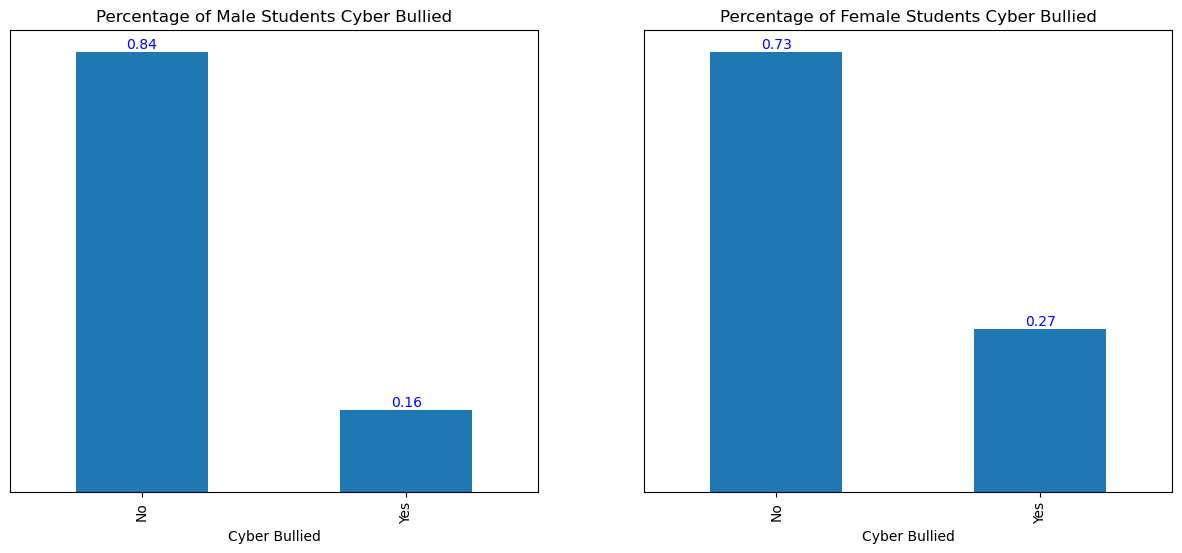

In [26]:
comparison_plot(male, female,
               "cyber_bullied", sex_title)

When it comes to cyber bullying, there is a little jump in the percentage of female students being bullied to 27% and a drop in the percentage of male students bullied to 16%.

### What Are The Effects Of Bullying
The goal here is to see how bullying influences students behaviour.

In [27]:
def bullied_in_school_barplot(column, yes=True):
    if yes:
        response = "Yes"
        t = ""
    else:
        response = "No"
        t = "Not"
        
    col  = column.replace("_", " ").title()
    ax = bullying[bullying["bullied_in_school"] == response][column].value_counts(normalize=True).plot.bar()
    plt.bar_label(ax.containers[0], color="b", fmt="%.2f")
    plt.xlabel(col)
    plt.yticks([])
    plt.title(f"Percentage of Students {t} Bullied In School Who {col}")
    


def bullied_not_school_barplot(column, yes=True):
    if yes:
        response = "Yes"
        t = ""
        
    else:
        response = "No"
        t = "Not"
        
    col  = column.replace("_", " ").title()
    ax = bullying[bullying["bullied_not_school"] == response][column].value_counts(normalize=True).plot.bar() 
    plt.bar_label(ax.containers[0], color="b", fmt="%.2f")
    plt.xlabel(col)
    plt.yticks([])
    plt.title(f"Percentage of Students {t} Bullied Outside School Who {col}")


def cyber_bullied_barplot(column, yes=True):
    if yes:
        response = "Yes"
        t = ""
    else:
        response = "No"
        t = "Not"
        
    col  = column.replace("_", " ").title()
    ax = bullying[bullying["cyber_bullied"] == response][column].value_counts(normalize=True).plot.bar() 
    plt.bar_label(ax.containers[0], color="b", fmt="%.2f")
    plt.xlabel(col)
    plt.yticks([])
    plt.title(f"Percentage of Students {t} Cyber Bullied Who {col}")


#### Are students who are bullied more likely to miss classes?

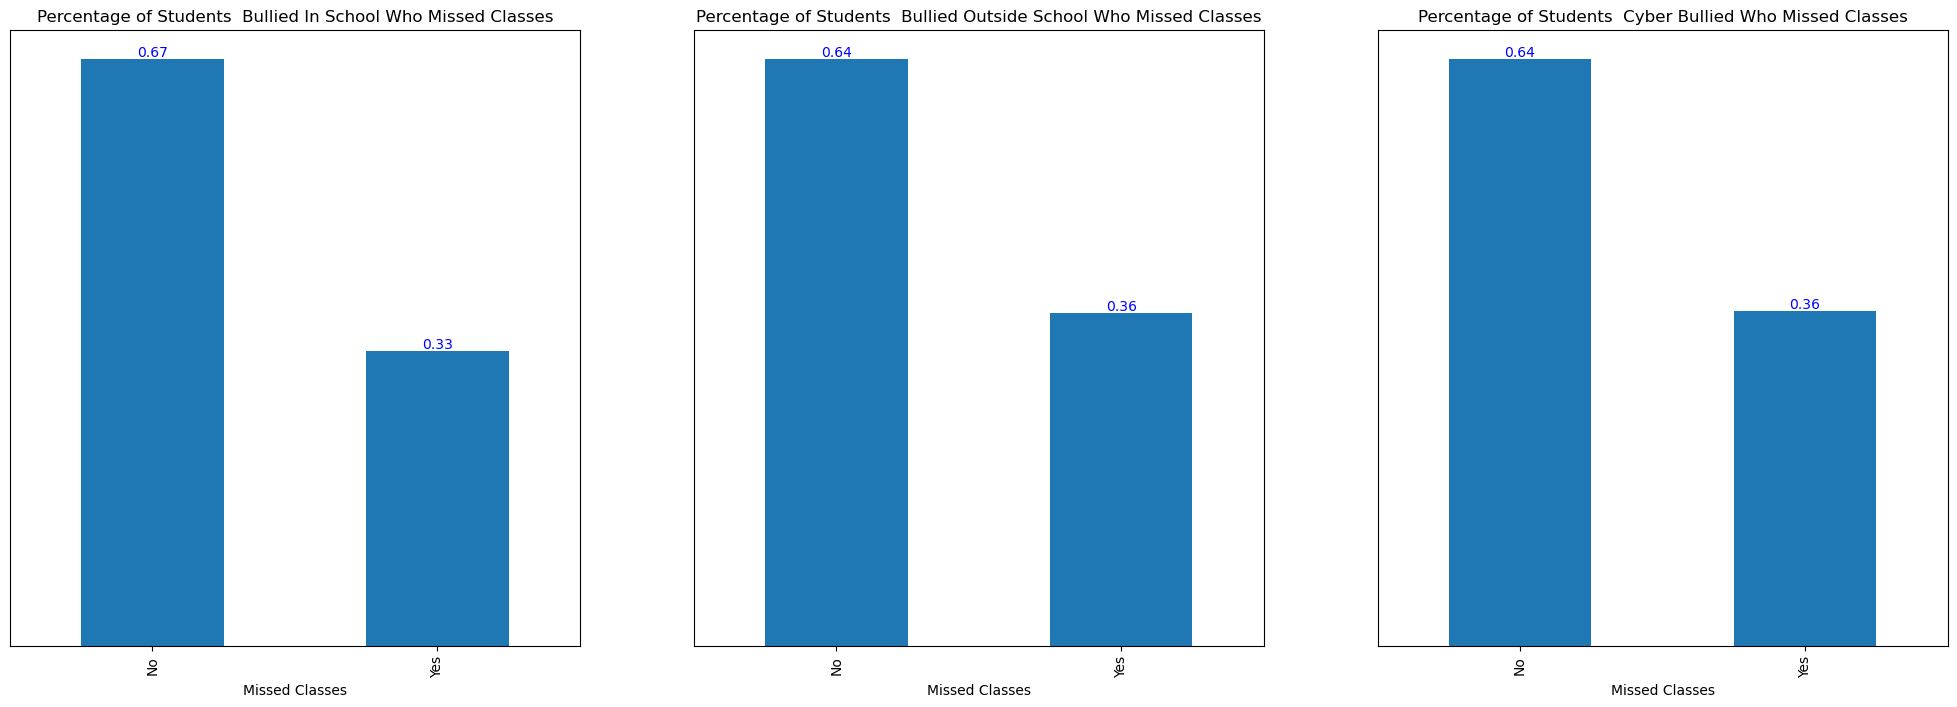

In [28]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 3, 1)
bullied_in_school_barplot("missed_classes")
plt.subplot(1, 3, 2)
bullied_not_school_barplot("missed_classes")
plt.subplot(1, 3, 3)
cyber_bullied_barplot("missed_classes")
plt.show()

Only a small percentage of students (about 35%) who were bullied missed classes. This number is however higher than the percentage of students who were not bullied that missed classes which is around 28%. That being said, students who were bullied were more likely to miss classes than those who weren't.

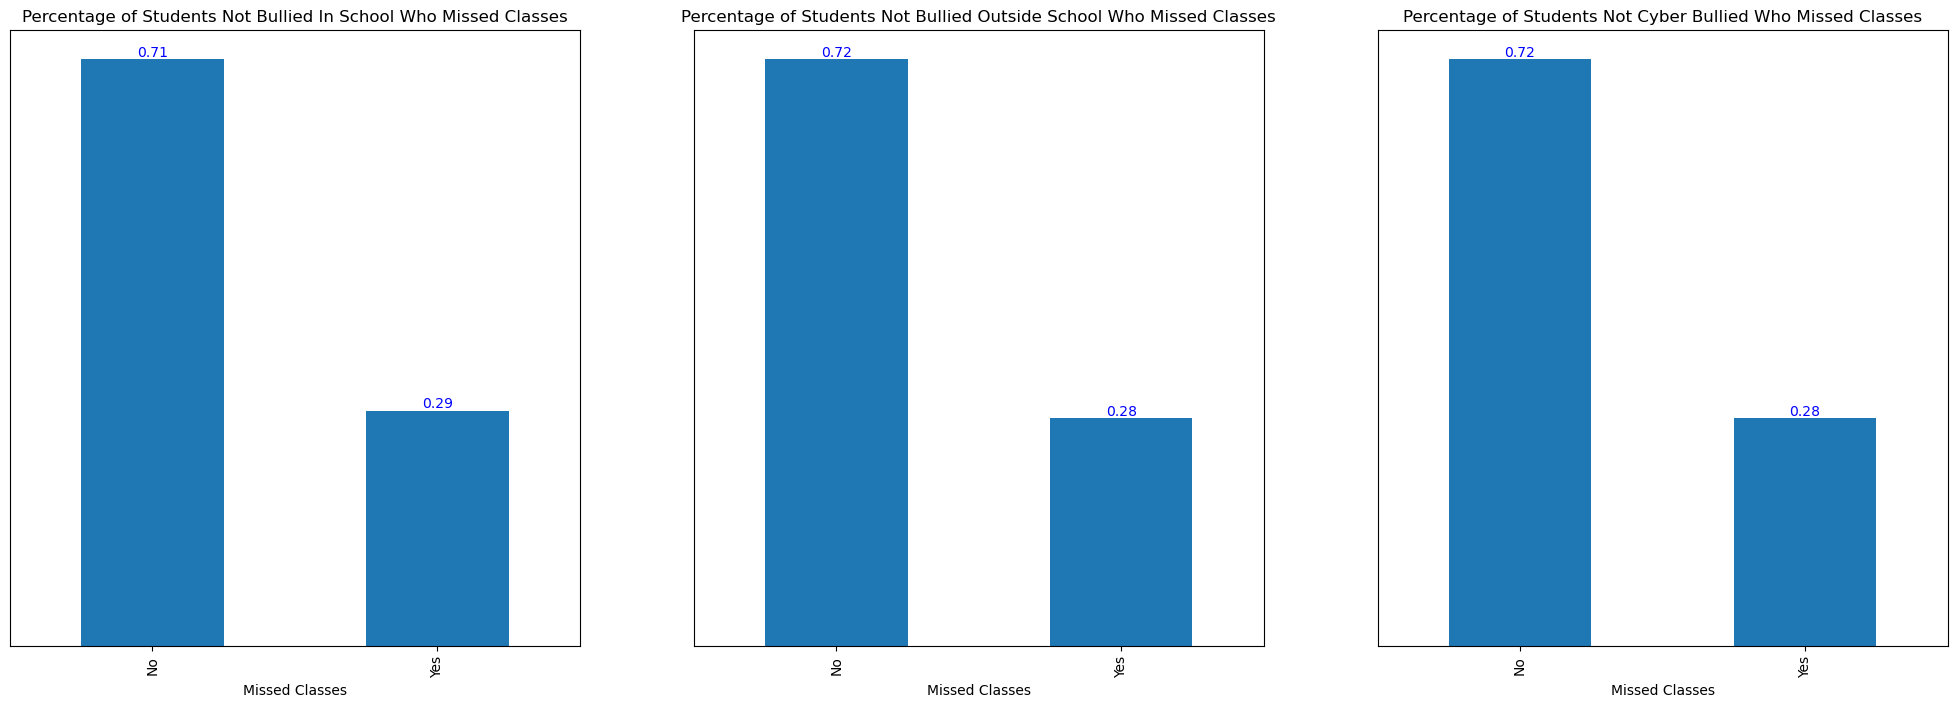

In [29]:
plt.figure(figsize=(25, 8))
plt.subplot(1, 3, 1)
bullied_in_school_barplot("missed_classes", yes=False)
plt.subplot(1, 3, 2)
bullied_not_school_barplot("missed_classes", yes=False)
plt.subplot(1, 3, 3)
cyber_bullied_barplot("missed_classes", yes=False)
plt.show()

#### Are students who are bullied more likely to feel lonely?

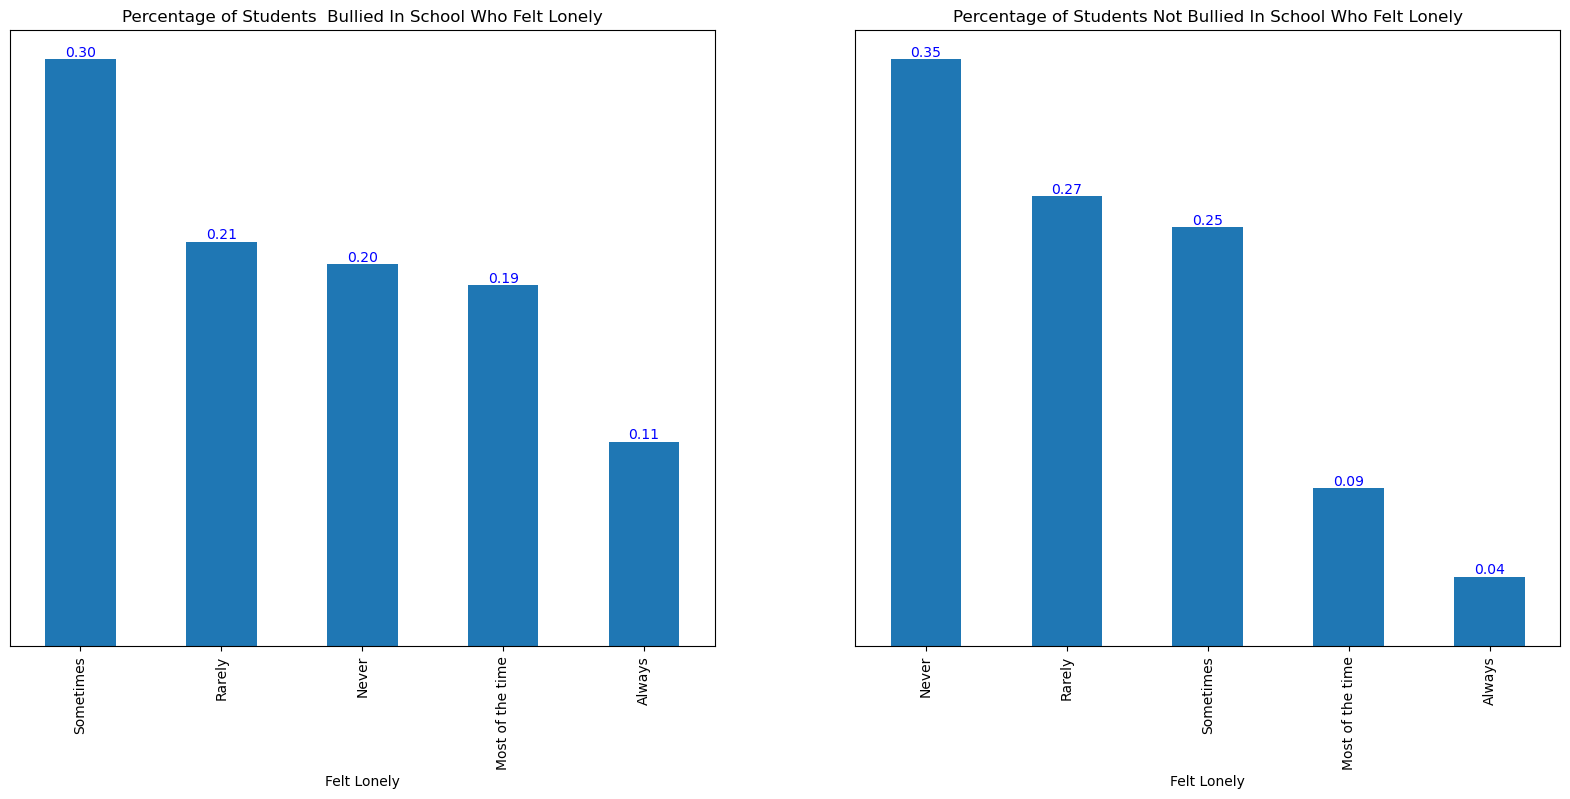

In [30]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
bullied_in_school_barplot("felt_lonely")
plt.subplot(1, 2, 2)
bullied_in_school_barplot("felt_lonely", yes=False)
plt.show()

In general, students who were bullied were more likely to feel lonely than students who were not bullied. 11% of students who were bullied in school admitted to always feeling lonely compared to 4% of students who weren't bullied. 35% of bullied students admitted to being sometimes lonely compared to 25% of the students who weren't bullied and 20% of students admitted to never feeling lonely compared to 35% of students who weren't bullied.

#### How much do parents understanding of a students problem reflect on whether they are being bullied or not.

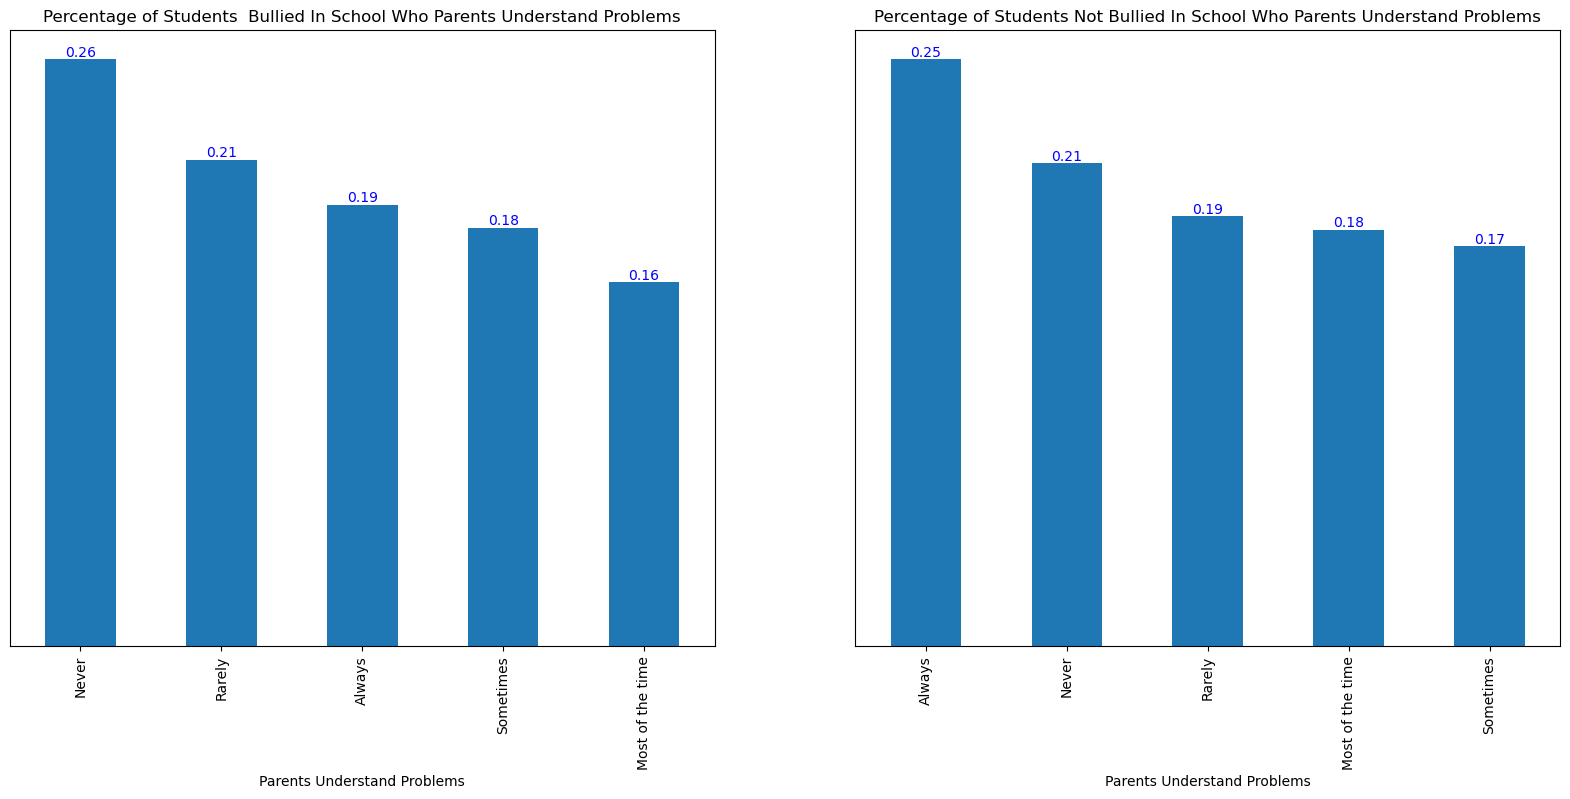

In [31]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
bullied_in_school_barplot("parents_understand_problems")
plt.subplot(1, 2, 2)
bullied_in_school_barplot("parents_understand_problems", yes=False)
plt.show()


Students who were bullied in school were less likely to have their problems understood by their parents. The same trend is observed for students who were bullied outside of school and those who were cyber bullied.

#### How do bullied students perceive other students

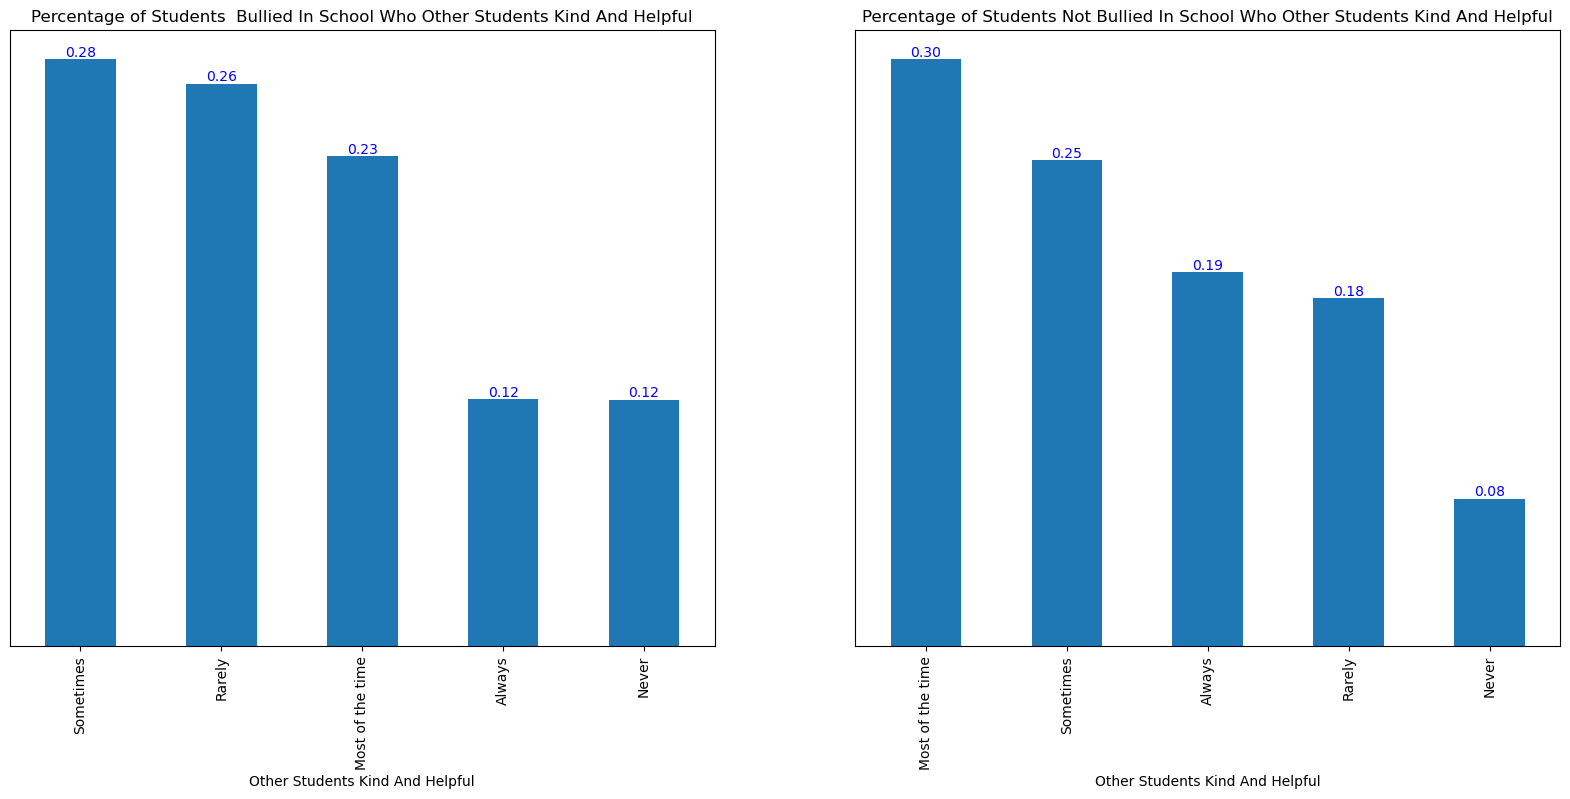

In [32]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
bullied_in_school_barplot("other_students_kind_and_helpful")
plt.subplot(1, 2, 2)
bullied_in_school_barplot("other_students_kind_and_helpful", yes=False)

#### Do the amount of close friends play a role in students being bullied or not?

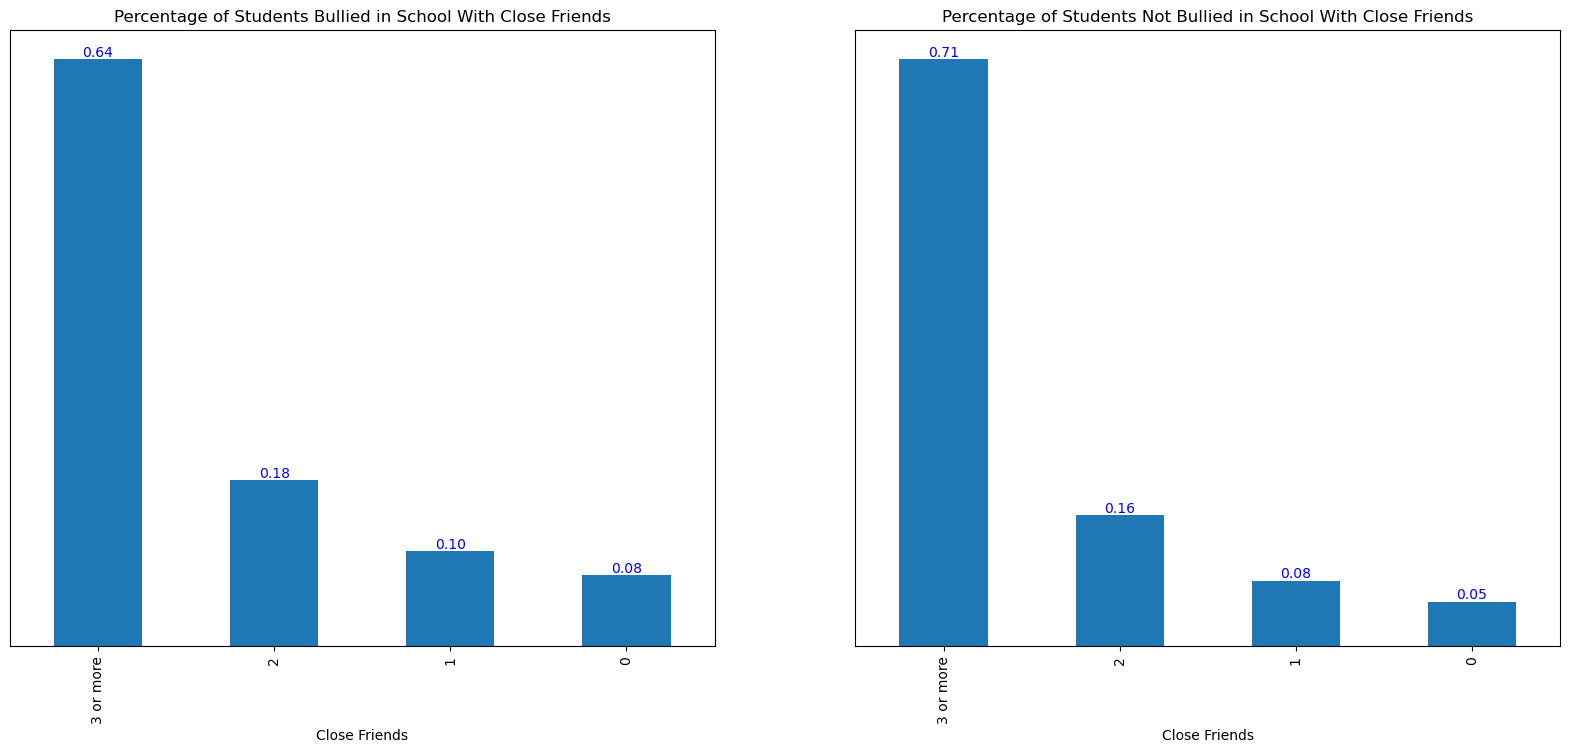

In [33]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
bullied_in_school_barplot("close_friends")
plt.title("Percentage of Students Bullied in School With Close Friends")
plt.subplot(1, 2, 2)
bullied_in_school_barplot("close_friends", yes=False)
plt.title("Percentage of Students Not Bullied in School With Close Friends")
plt.show()

Bullied students were less likely to have more close friends than students who weren't bullied. Although the difference isn't huge.

#### Are bullied students more likely to be physically attacked?

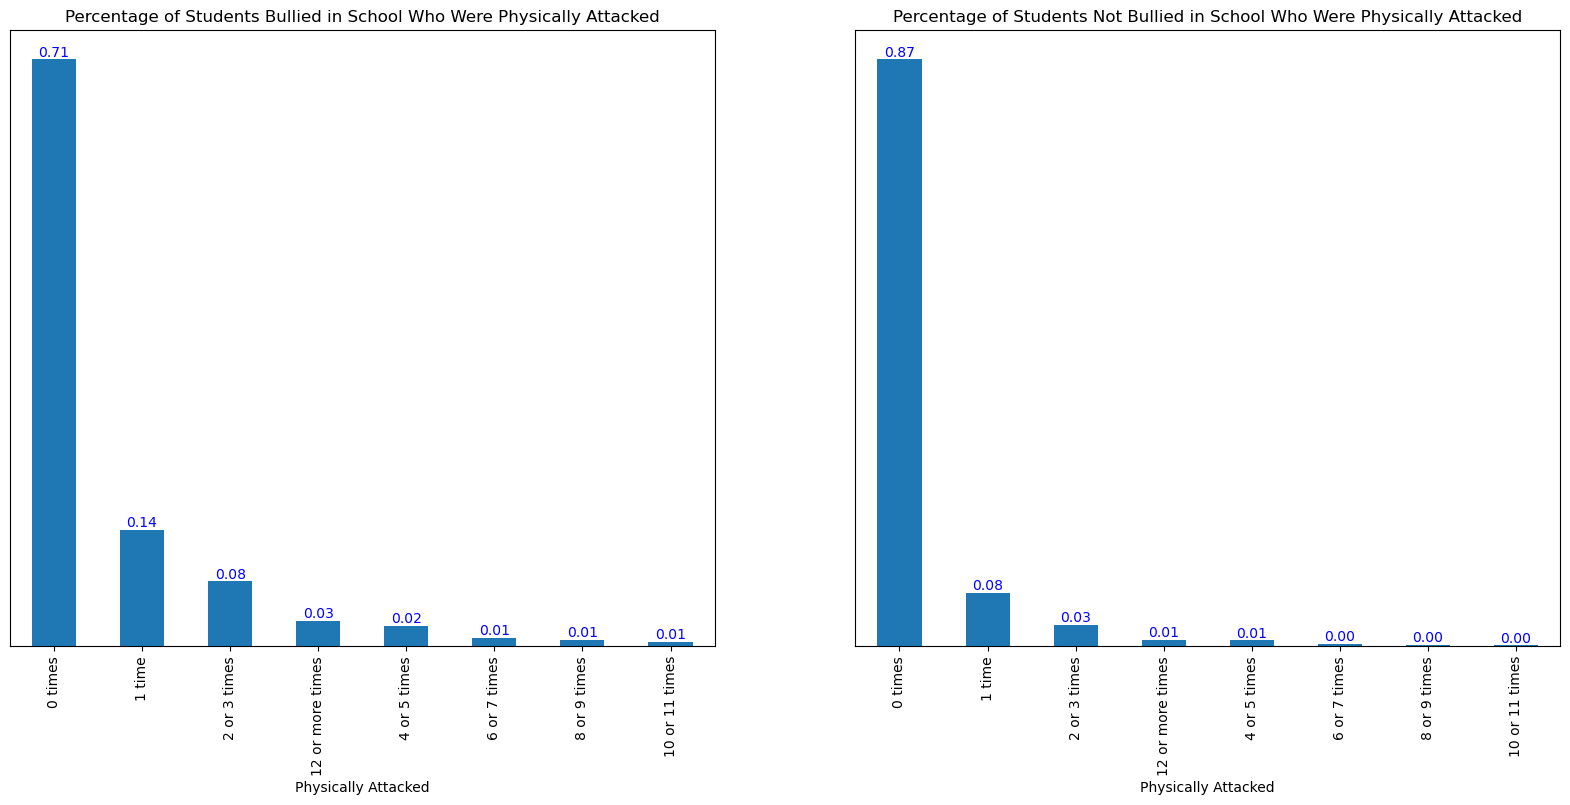

In [34]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
bullied_in_school_barplot("physically_attacked")
plt.title("Percentage of Students Bullied in School Who Were Physically Attacked")
plt.subplot(1, 2, 2)
bullied_in_school_barplot("physically_attacked", yes=False)
plt.title("Percentage of Students Not Bullied in School Who Were Physically Attacked")
plt.show()

Students who were bullied were more likely to be physically attacked than students who weren't.

## Conclusion
So many factors are indicative of bullying. How they perceive other students, their parents understanding of their problems and how lonely they feel. So far, it is clear that:

* A person's weight doesn't determine whether they will be bullied or not.
* Female students were more likely to be bullied than male students.
* Bullied students felt more lonely than students who weren't bullied and missed classes a bit more frequently.
* Bullied students were more likely to be physically attacked.